<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline

In [3]:
import copy
import datetime as dt
import os
import platform
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go

PROJECT_PATH = os.path.dirname(os.getcwd())
print(f'PROJECT_PATH = {PROJECT_PATH}')

if not PROJECT_PATH in sys.path:
    sys.path.append(PROJECT_PATH)
    
print('Platform:', platform.platform())
print('Python version:', sys.version)
print('numpy version:', np.__version__)
np.set_printoptions(threshold=sys.maxsize)

PROJECT_PATH = C:\Users\pietr\Documents\Azure\py_fatigue
Platform: Windows-10-10.0.25131-SP0
Python version: 3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
numpy version: 1.21.5


In [4]:
#matplotlib tweaking
plt.rcParams['figure.figsize'] = (10.5/2.514/0.7, 4.5/2.514/0.7)
plt.rcParams["font.family"] = "Sans"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.grid"] = True
plt.rcParams['grid.color'] = "#CCCCCC"
plt.rcParams['grid.linestyle'] = "-"
plt.rcParams['grid.color'] = "#DDDDDD"
plt.rcParams['grid.linestyle'] = "-"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['lines.markersize'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = True

In [14]:
import py_fatigue.cycle_count.rainflow as rf
import py_fatigue.cycle_count.histogram as ht
from py_fatigue.sn_curve import SNCurve
import py_fatigue.damage as damage
from py_fatigue.cycle_count import CycleCount
from py_fatigue.mean_stress import MeanStress
from py_fatigue.stress_range import StressRange
import py_fatigue.cycle_count.cycle_count as fcc
import py_fatigue.utils as pfu

In [6]:
DATA_FOLDER = os.path.join(PROJECT_PATH, 'tests', 'data')

In [7]:
stress_signal = 1E6 * np.loadtxt(os.path.join(DATA_FOLDER, 'strain_signal.txt'))

In [8]:

SIGNAL = np.array([-3, 1, -1, 5, -1, 5, -1, 0, -4, 2, 1, 4, 1, 4, 3, 4, 2])
# fmt: off
DICT = {'nr_small_cycles': 0,
 'range_bin_lower_bound': 0.5,
 'range_bin_width': 1,
 'mean_bin_lower_bound': -0.75,
 'mean_bin_width': 0.5,
 'hist': [[1.0],
  [0.0, 1.0],
  [],
  [],
  [1.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
  [0.0, 0.0, 1.0],
  [],
  [1.0]],
 'lg_c': [],
 'res': [[1.0, 8.0], [0.5, 9.0], [0.0, 8.0], [3.0, 2.0]],
 'res_sig': [-3, 5, -4, 4, 2]}
# fmt: on
CTS_1 = np.array([1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5])
S_R_1 = np.array([1., 2., 1., 6., 3., 1., 8., 9., 8., 2.])
M_S_1 = np.array([-0.5,  0. ,  1.5,  2. ,  2.5,  3.5,  1. ,  0.5,  0. ,  3. ])
STRESS_RANGE_1 = StressRange(CTS_1, S_R_1, _bin_lb=0.5, bin_width=1)
MEAN_STRESS_1 = MeanStress(CTS_1, M_S_1, _bin_lb=-0.75, bin_width=0.5)
SIGNAL_0 = np.array([-3, 3, -3, 3, -3, 3, -3, 3, -3, 3, -3, 3, -3, 3, -3])

In [9]:
CC_TS_0 = CycleCount.from_timeseries(
    SIGNAL_0,
#     timestamp=TIMESTAMP_1,
    range_bin_lower_bound=0.5,
    range_bin_width=1,
    mean_bin_lower_bound=-0.75,
    mean_bin_width=0.5,
    name="Test_CC",
)
cc_from_ts = CycleCount.from_timeseries(
    SIGNAL,
    timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc),
    range_bin_lower_bound=0.5,
    range_bin_width=1,
    mean_bin_lower_bound=-0.75,
    mean_bin_width=0.5,
    name="Test_CC",
)
cc_from_ts_from_rf = CycleCount.from_rainflow(
    cc_from_ts.as_dict(), timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc), name="Test_CC"
)
cc_from_rf = CycleCount.from_rainflow(
    DICT,
    timestamp=dt.datetime(2019, 1, 1, tzinfo=dt.timezone.utc),
    name="Test_CC"
)

In [10]:
EXOTIC = SNCurve(
    [3, 5, 7], [10.970, 13.617, 16], endurance=2.134e11, curve="exotic"
)
DNV_B1A = SNCurve(
    [4, 5],
    [15.117, 17.146],
    norm="DNVGL-RP-C203",
    environment="Air",
    curve="B1",
)
DNV_B1A_END = SNCurve(
    [4, 5],
    [15.117, 17.146],
    norm="DNVGL-RP-C203",
    environment="Air",
    curve="B1",
    endurance=1e9,
)
DNV_B1A = SNCurve(
    [4, 5],
    [15.117, 17.146],
    norm="DNVGL-RP-C203",
    environment="Air",
    curve="B1",
)
DNV_B1W = SNCurve(
    [4, 5],
    [14.917, 17.146],
    norm="DNVGL-RP-C203",
    environment="Seawater with cathodic protection",
    curve="B1",
)
DNV_B1C = SNCurve(
    slope=3,  # SNCurve can handle multiple slope and
    intercept=12.436,  # intercept types, as long as their sizes
    norm="DNVGL-RP-C203",  # are compatible. The slope and intercept attrs
    environment="Free corrosion",  # will be stored as numpy arrays.
    curve="B1",
)
DNV_C_C = SNCurve(
    [3],
    12.115,
    norm="DNVGL-RP-C203",
    environment="Free corrosion",
    curve="C",
)
DNV_E_C = SNCurve(
    3,
    intercept=[
        11.533,
    ],
    norm="DNVGL-RP-C203",
    environment="Free corrosion",
    curve="E",
)
DNV_W3C = SNCurve(
    [3],
    intercept=[
        10.493,
    ],
    norm="DNVGL-RP-C203",
    environment="Free corrosion",
    curve="E",
)

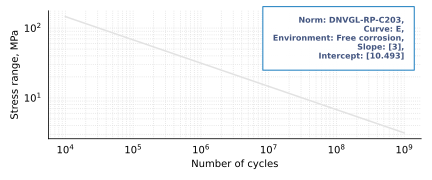

In [13]:
DNV_W3C

In [41]:
import pytest

assert sum(damage.calc_pm(CC_TS_0, DNV_W3C)) == pytest.approx(sum(CC_TS_0.count_cycle) / DNV_W3C.get_cycles(np.mean(CC_TS_0.stress_range)), 1E-12)

In [21]:
1 / DNV_W3C.get_cycles(np.mean(CC_TS_0.stress_range))

6.94150676346309e-09

In [35]:
sum(damage.calc_pm(CC_TS_0, DNV_W3C))

4.859054734424165e-08

In [36]:
sum(CC_TS_0.count_cycle) / DNV_W3C.get_cycles(np.mean(CC_TS_0.stress_range))

4.8590547344241634e-08

In [42]:
[(-1) ** _ for _ in range(10)]

[1, -1, 1, -1, 1, -1, 1, -1, 1, -1]